# Underfitting vs. Overfitting

Example from scikit-learn:  https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html?highlight=polynomial%20regression

Linear regression versus Polynomial regression

Automatically created module for IPython interactive environment


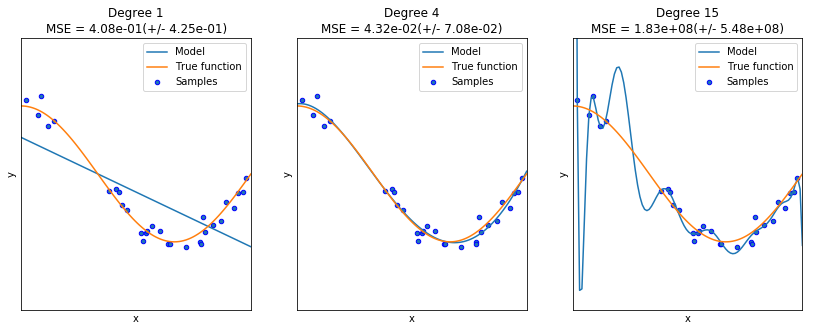

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Load datasets (base on Fashion MNIST Example)

Fashion MNIST Example to load datasets (CSV)

In [ ]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='ccb11e66-8aa7-4b6a-921f-97a7a56bd2fc', project_access_token='p-2da62ae72d80f7819317671c0079a6af3ca5e8eb')

In [ ]:
DATA_PATH = 'fashion-mnist_train.csv'

# Create method to find filepath based on filename
def get_file_handle(fname):
    # Project data path for the raw data file
    data_path = project.get_file(fname)
    data_path.seek(0)
    return data_path

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
data = pd.read_csv(data_path)
# Display the first five rows
data.head()


# Nonlinear data

Load nonlinear data (time series in astronomy)

Click on More -> Insert project token in the top-right menu section

In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='35713bef-d975-481f-b55d-7d297d41068b', project_access_token='p-d40d61b27d0f9614986cbb1a0f928767b4babd24')
pc = project.project_context


Load *.dat file

In [4]:
import pandas as pd
DATA_PATH = 'DS-5-1-GAP-0-1-N-0_v2.dat'

# Create method to find filepath based on filename
def get_file_handle(fname):
    # Project data path for the raw data file
    data_path = project.get_file(fname)
    data_path.seek(0)
    return data_path

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
data = pd.read_csv(data_path,header=None)
# Display the first five rows
data.head()

,0
0,0.0000000e+000 1.7494272e+001 1.7041740e+001
1,2.1185631e+000 1.7645963e+001 1.7174853e+001
2,3.0563003e+000 1.7695080e+001 1.7242391e+001
3,4.1558498e+000 1.7732900e+001 1.7327343e+001
4,4.9290829e+000 1.7746534e+001 1.7388672e+001


Load *.csv data

In [5]:
import pandas as pd
DATA_PATH = 'DS-5-1-GAP-0-1-N-0_v2.csv'
#DATA_PATH = 'DS-5-1-GAP-1-1-N-1_v2.csv'
#DATA_PATH = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Create method to find filepath based on filename
def get_file_handle(fname):
    # Project data path for the raw data file
    data_path = project.get_file(fname)
    data_path.seek(0)
    return data_path

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH)
d = pd.read_csv(data_path,header=None)
# Display the first five rows
d.head()

,0,1,2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39


Plotting

Text(0.5, 1.0, 'dataset: DS-5-1-GAP-0-1-N-0_v2.csv')

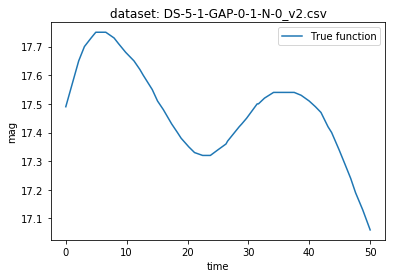

In [8]:
import matplotlib.pyplot as plt
plt.plot(d[0], d[1], label="True function")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ DATA_PATH)

# Polynomial regression on nonlinear data

In [26]:
d.at[0,0]
len(d[0])
d.at[len(d[0])-1,0]
#d

50.0

In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='35713bef-d975-481f-b55d-7d297d41068b', project_access_token='p-d40d61b27d0f9614986cbb1a0f928767b4babd24')
pc = project.project_context

In [2]:
#Metrics
from sklearn.metrics import mean_squared_error
#Load data
import pandas as pd
DATA_PATH_TRUE = 'DS-5-1-GAP-0-1-N-0_v2.csv'
DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'

# Create method to find filepath based on filename
def get_file_handle(fname):
    # Project data path for the raw data file
    data_path = project.get_file(fname)
    data_path.seek(0)
    return data_path

# Using pandas to read the data 
data_path = get_file_handle(DATA_PATH_TRUE)
d_true = pd.read_csv(data_path,header=None)
data_path = get_file_handle(DATA_PATH_NOISE1)
d_noise1 = pd.read_csv(data_path,header=None)
data_path = get_file_handle(DATA_PATH_NOISE2)
d_noise2 = pd.read_csv(data_path,header=None)

#Polynomial interpolation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=polynomial%20regression
degree = 5 #polynomial degree
#model = make_pipeline(PolynomialFeatures(degree), Ridge())
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

#DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
X = d_noise1[0]  #time
x = X[:, np.newaxis]
Y = d_noise1[1]  #mag_A
y = Y[:, np.newaxis]

X_test = d_true[0]
Y_test = d_true[1]

#Training
model.fit(x, y)  #get polynomial model for training data

x_test = X_test[:, np.newaxis]
y_test = Y_test[:, np.newaxis]

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()





MSE train  0.00038153202774737695
MSE test  0.000419585047827184


<Figure size 640x480 with 1 Axes>

MSE train  0.0023064993320141064
MSE test  0.0028643408655721347


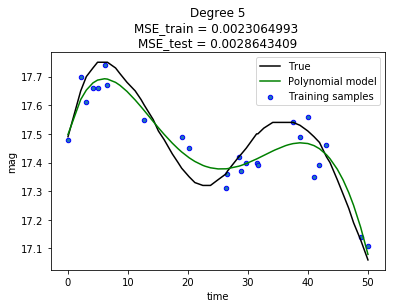

In [4]:
# DATA_PATH_NOISE2 = 'DS-5-1-GAP-5-1-N-3_v2.csv'
X = d_noise2[0]  #time
x = X[:, np.newaxis]
Y = d_noise2[3]  #mag_A
y = Y[:, np.newaxis]

#Training
model.fit(x, y)  #get polynomial model for training data

#Testing
y_pred_train = model.predict(x) 
y_pred_test = model.predict(x_test)


MSE_train = mean_squared_error(y,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)

print("MSE train ",MSE_train)
print("MSE test ",MSE_test)


import matplotlib.pyplot as plt
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.8} \nMSE_test = {:.8}".format(
        degree, MSE_train, MSE_test))
plt.show()